In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium import plugins

df_ovnis = pd.read_csv("ovnis.csv", index_col=[0])

df_relatos = df_ovnis.groupby('State').count()
df_relatos = df_relatos.sort_values(ascending=False, by="Posted")['Posted']

print("Os quatro Estados com mais relatos")
print(df_relatos.head(4))

Os quatro Estados com mais relatos
State
CA    7911
FL    4352
WA    3225
TX    2882
Name: Posted, dtype: int64


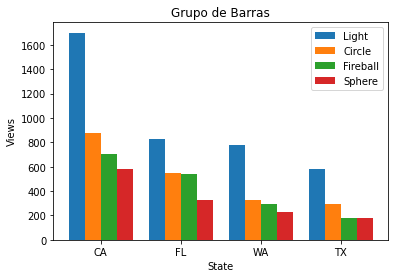

In [336]:
#Dataframes que recebem apenas relatos referente aos seu tipo de formato
light = df_ovnis[df_ovnis['Shape'] == 'Light']
circle = df_ovnis[df_ovnis['Shape'] == 'Circle']
fireball = df_ovnis[df_ovnis['Shape'] == 'Fireball']
sphere = df_ovnis[df_ovnis['Shape'] == 'Sphere']

#Declara vetores vazios que receberao uma sequencia de relatos de cada Estado
estados_light = []
estados_circle = []
estados_fireball = []
estados_sphere = []

#Vetor com os 4 estados com mais relatos em ordem decrescente
states = ['CA', 'FL', 'WA', 'TX']

#incrementa nos vetores criados anteriormente o numero de relatos referente ao Estado e formato
for state in states:
  estados_light.append(light[light['State'] == state].count()['Posted'])
  estados_circle.append(circle[circle['State'] == state].count()['Posted'])
  estados_fireball.append(fireball[fireball['State'] == state].count()['Posted'])
  estados_sphere.append(sphere[sphere['State'] == state].count()['Posted'])

# Cria eixo x com uma separação de 0.20 entre as barras
x1 =  np.arange(len(estados_light))
x2 = [x + 0.20 for x in x1]
x3 = [x + 0.20 for x in x2]
x4 = [x + 0.20 for x in x3]

#Plota as barras
plt.bar(x1, estados_light, width=0.20, label = 'Light')
plt.bar(x2, estados_circle, width=0.20, label = 'Circle')
plt.bar(x3, estados_fireball, width=0.20, label = 'Fireball')
plt.bar(x4, estados_sphere, width=0.20, label = 'Sphere')

#Plota o nome de cada Estado no eixo X
plt.xticks([x + 0.30 for x in range(len(estados_light))], states)

# insere uma legenda no gráfico
plt.legend()

plt.title("Grupo de Barras")
plt.xlabel('State')
plt.ylabel('Views')
plt.show()

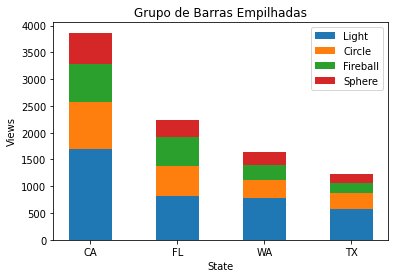

In [337]:
# Cria eixo x com a mesma separação entre as barras
x =  np.arange(len(estados_light))

#Declara vetores que sevirao para distanciar a margem inferior das barras
fireball_bottom = []
sphere_bottom = []
for i in range(0,4):
  fireball_soma = int(estados_light[i]) + int(estados_circle[i]) #soma a primeira barra com a barra de baixo
  fireball_bottom.append(fireball_soma) #incrementa soma no vetor

  sphere_soma = int(estados_light[i]) + int(estados_circle[i]) + int(estados_fireball[i]) #soma as duas primeiras barras com a de baixo
  sphere_bottom.append(sphere_soma) #incrementa soma no vetor

#Plota as barras
plt.bar(x, estados_light, width=0.50, label = 'Light')
plt.bar(x, estados_circle, width=0.50, label = 'Circle', bottom=estados_light) #Plota a barra com a margem inferior referente a ultima barra
plt.bar(x, estados_fireball, width=0.50, label = 'Fireball', bottom=fireball_bottom)
plt.bar(x, estados_sphere, width=0.50, label = 'Sphere', bottom=sphere_bottom)

#Plota o nome de cada Estado no eixo X
plt.xticks([x for x in range(len(estados_light))], states)

# insere uma legenda no gráfico
plt.legend()

plt.title("Grupo de Barras Empilhadas")
plt.xlabel('State')
plt.ylabel('Views')
plt.show()

In [347]:
#lê o  arquivo csv com todas latitudes e longitudes dos estados
df_longlat = pd.read_csv("uscities.csv")

#inicias os arrays
cidades = []
lats = []
lngs = []

#adicionas aos arrays todas cidades, latitudes e longitudes com os mesmos index
for i, row in df_longlat.iterrows():
  cidades.append(row["city"])
  lats.append(row["lat"])
  lngs.append(row["lng"])

print("Carregou todas as cidades, longitudes e latitudes")

Carregou todas as cidades, longitudes e latitudes


In [343]:
#Array contendo as siglas de  todos os estados dos EUA
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

selection = df_ovnis['State'].isin(states)
#Dataframe ja filtrado com estados so dos EUA
df_eua = df_ovnis[selection]

#funcao que retorna a latitude de acordo com o nome da cidade
def getLatitude(city):
  latitude = 0
  for i in range(0, len(cidades)):
    if(city == cidades[i]):
      latitude = lats[i]
  return latitude

#funcao que retorna a longitude de acordo com o nome da cidade
def getLongitude(city):
  longitude = 0
  for i in range(0, len(cidades)):
    if(city == cidades[i]):
      longitude = lngs[i]
  return longitude

#inicia array que recebera coordenas de todas as cidades com relatos
coordenadas = []
for i in range(0, len(df_eua)):
  coordenadas.append([getLatitude(df_eua.iloc[i].City), getLongitude(df_eua.iloc[i].City)])

print("Dataframe Carregado!")
#ESSE PROCESSO PODE DEMORAR MUITO, POIS SÃO MUITAS CIDADES

Dataframe Carregado!


In [345]:
# Plotando mapa dos EUA:
mapa = folium.Map(
    location=[37.7550585, -106.2454855], #coordenas dos EUA
    tiles='Stamen Terrain',
    zoom_start = 6
)

#adiciona o plugin de calor pra plotar o mapa com relatos
mapa.add_child(plugins.HeatMap(coordenadas))
mapa

In [346]:
print("5. A próxima etapa é criar um mapa apenas do estado da Califórnia, para analisar se essas visualizações se distribuem de forma homogênea dentro do estado.")

#inicias os arrays
cidades_ca = []
lats_ca = []
lngs_ca = []

for i, row in df_longlat.iterrows():
  if(row["state_id"] == "CA"):
    cidades_ca.append(row["city"])
    lats_ca.append(row["lat"])
    lngs_ca.append(row["lng"])

#funcao que retorna a latitude de acordo com o nome da cidade
def getLatitudeCA(city):
  latitude = 0
  for i in range(0, len(cidades_ca)):
    if(city == cidades_ca[i]):
      latitude = lats_ca[i]
  return latitude

#funcao que retorna a longitude de acordo com o nome da cidade
def getLongitudeCA(city):
  longitude = 0
  for i in range(0, len(cidades_ca)):
    if(city == cidades_ca[i]):
      longitude = lngs_ca[i]
  return longitude

#plotando mapa da california
mapa_california = folium.Map(
    location=[34.0194, -118.411], #coordenas de Los Angeles
    tiles='Stamen Terrain',
    zoom_start = 6
)

df_california = df_eua[df_eua['State']=='CA']

coordenadas_california = []
for i in range(0, len(df_california)):
  coordenadas_california.append([getLatitudeCA(df_california.iloc[i].City), getLongitudeCA(df_california.iloc[i].City)])

mapa_california.add_child(plugins.HeatMap(coordenadas_california))
mapa_california

5. A próxima etapa é criar um mapa apenas do estado da Califórnia, para analisar se essas visualizações se distribuem de forma homogênea dentro do estado.


In [348]:
print("6. Onde na Califórnia está localizada a maior quantidade de visualizações de objetos voadores não identificados? E qual será a razão?")
print("As áreas da California que mais têm relatos é Los Angeles e São Francisco, muito provavelmente porque é um Estado liberal onde existe a liberação das drogas, como a maconha, e também em entorpecentes")

6. Onde na Califórnia está localizada a maior quantidade de visualizações de objetos voadores não identificados? E qual será a razão?
As áreas da California que mais têm relatos é Los Angeles e São Francisco, muito provavelmente porque é um Estado liberal onde existe a liberação das drogas, como a maconha, e também em entorpecentes
